In [11]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

### Load Data

In [ ]:
dataset_path = '../dataset/'

audio_data = []
labels = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Is a direcotry
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):  # Is audio file .wav
                file_path = os.path.join(folder_path, file)
                
                # Load audio file
                y, sr = librosa.load(file_path, sr=None)  # sr=None to keep the original sample rate
                
                # Retrieve emotion from the audio file name
                emotion = int(file.split('-')[2])
                
                audio_data.append(y)
                labels.append(emotion)

                print(f"Chargé {file} avec taux d'échantillonnage {sr} et émotion {emotion}")

Chargé 03-01-01-01-01-01-01.wav avec taux d'échantillonnage 48000 et émotion 1
Chargé 03-01-01-01-01-02-01.wav avec taux d'échantillonnage 48000 et émotion 1
Chargé 03-01-01-01-02-01-01.wav avec taux d'échantillonnage 48000 et émotion 1
Chargé 03-01-01-01-02-02-01.wav avec taux d'échantillonnage 48000 et émotion 1
Chargé 03-01-02-01-01-01-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-01-01-02-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-01-02-01-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-01-02-02-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-02-01-01-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-02-01-02-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-02-02-01-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-02-02-02-02-01.wav avec taux d'échantillonnage 48000 et émotion 2
Chargé 03-01-03-01-01-01-01.wav avec taux d'échantil

In [17]:
# Create a folder to save spectrogram images
spectrograms_dir = '../audio_representations/spectrograms'
os.makedirs(spectrograms_dir, exist_ok=True)

def generate_spectrogram(y, sr, output_file):
    # Compute spectrogram with short-time Fourier transform (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Generate and save
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
# Create a folder to save MFCCs images
MFCC_dir = '../audio_representations/MFCC'
os.makedirs(MFCC_dir, exist_ok=True)

def generate_mfcc(y, sr, output_file, n_mfcc=13):
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Generate and save
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_0_emotion_1.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_1_emotion_1.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_2_emotion_1.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_3_emotion_1.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_4_emotion_2.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_5_emotion_2.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_6_emotion_2.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_7_emotion_2.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_8_emotion_2.png
Spectrogramme sauvegardé sous ../audio_representations/spectrograms\spectrogram_9_emotion_2.png
Spectrogramme sauvegardé sous ../audio_r

KeyboardInterrupt: 

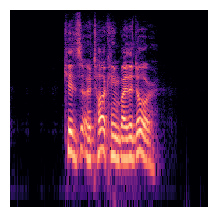

In [ ]:
for idx, (y, label) in enumerate(zip(audio_data, labels)):
    output_file = os.path.join(spectrograms_dir, f'spectrogram_{idx}_emotion_{label}.png')
    generate_spectrogram(y, sr, output_file)
    print(f"Spectrogramme sauvegardé sous {output_file}")
    

In [ ]:
for idx, (y, label) in enumerate(zip(audio_data, labels)):
    output_file = os.path.join(MFCC_dir, f'mfcc_{idx}_emotion_{label}.png')
    generate_mfcc(y, sr, output_file)
    print(f"MFCCs sauvegardé sous {output_file}")